In [1]:
import sys
import os

# Add the project root directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

# Import dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import re
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import pyLDAvis.lda_model
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from scripts.sentiment_analysis import ArticleDataAnalyzer
from sklearn.pipeline import Pipeline


In [3]:
raw_analyst = pd.read_csv("../Data/raw_analyst_ratings.csv")

In [4]:
raw_analyst.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [5]:
raw_analyst.rename(columns = {'Unnamed: 0' : 'id'}, inplace = True)

In [6]:
raw_analyst.head(10)

,id,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [7]:
raw_analyst.shape

(1407328, 6)

In [8]:
raw_analyst.isnull().sum()

id           0
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [9]:
analyzer = ArticleDataAnalyzer(raw_analyst)

In [10]:
analyzer.ensure_nltk_resources()

In [11]:
analyzer.format_datetime()

In [12]:
analyzer.analyzing_headline()

c:\ProgramData\anaconda3\envs\KAIMw1\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\envs\KAIMw1\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\envs\KAIMw1\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 

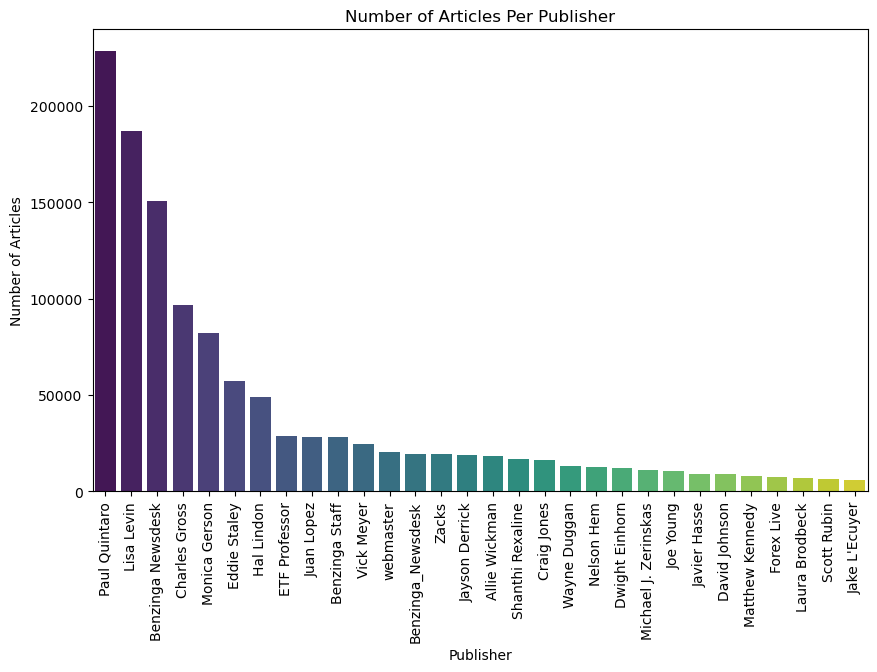

In [13]:
analyzer.publisher_analysis()

c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_class', data=self.df, palette='coolwarm')


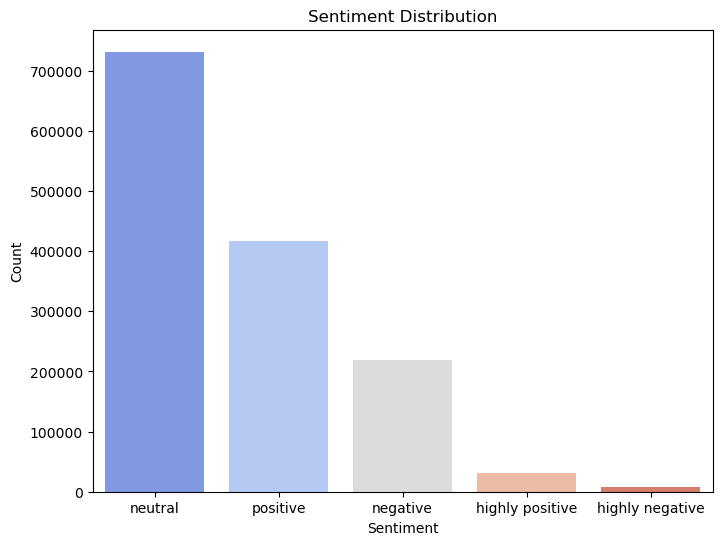

Sentiment Counts:
Neutral: 731893
Positive: 417308
Negative: 218678
Highly positive: 31432
Highly negative: 8017


c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_publisher.values, y=sentiment_by_publisher.index, palette='coolwarm')


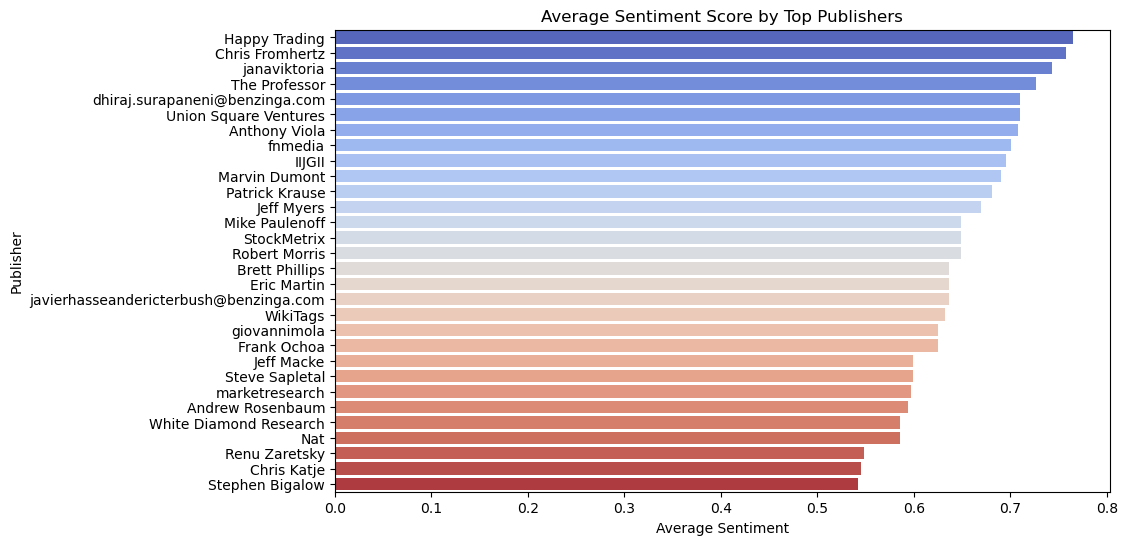

c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publisher', y='article_count', data=publisher_sentiment, ax=ax1, palette='Blues_d')
c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(publisher_sentiment['publisher'], rotation=90)


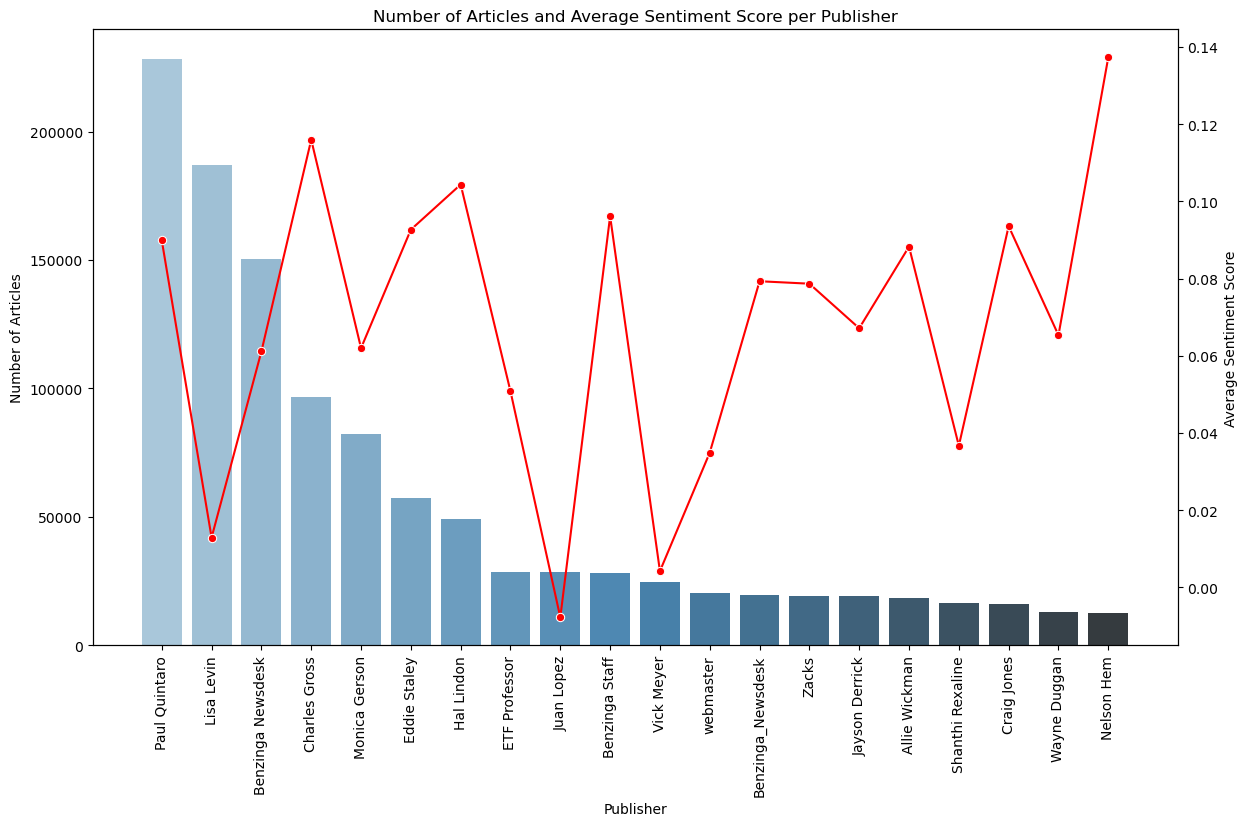

In [14]:
analyzer.sentiment_analysis()

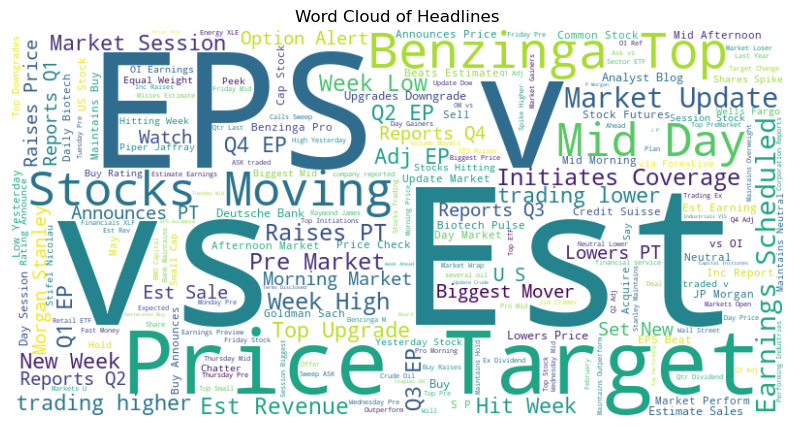

In [15]:
analyzer.headline_analysis()

c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x='year', palette='viridis')


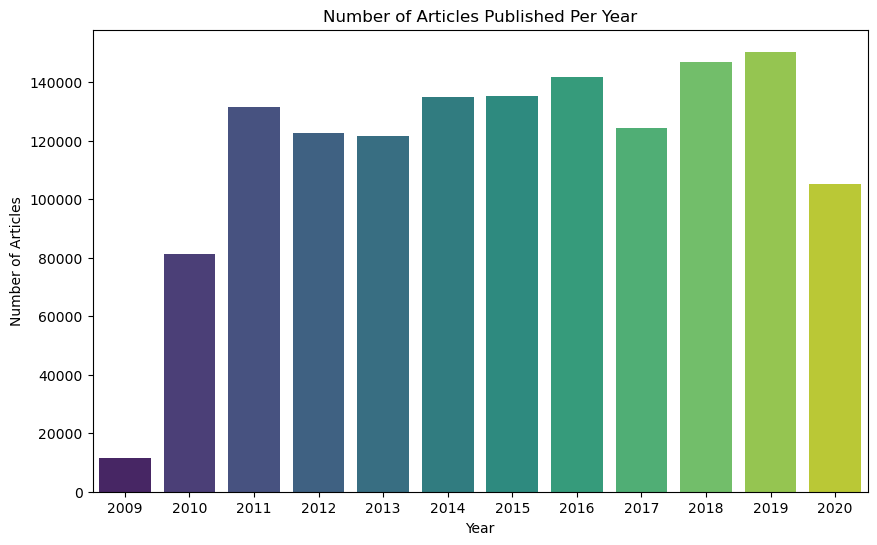

c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:163: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x='month', palette='viridis')


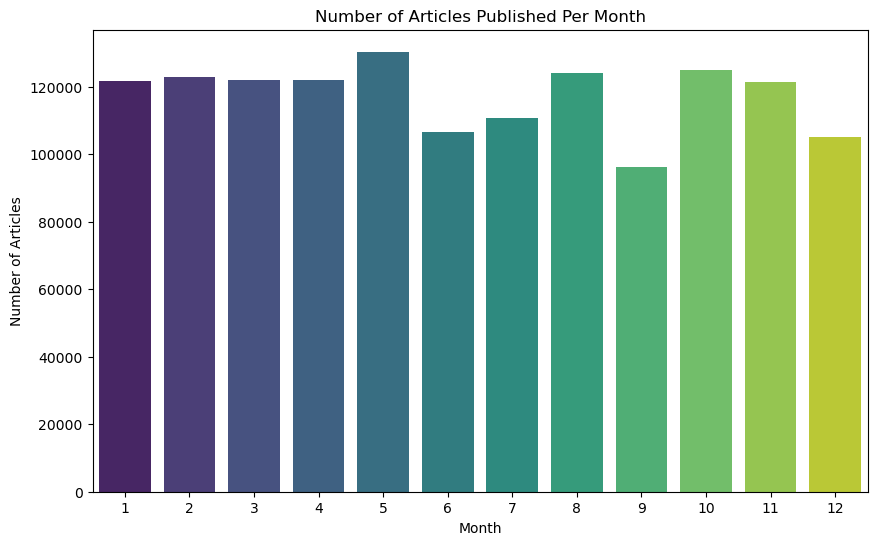

c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x='dayofweek', palette='viridis')


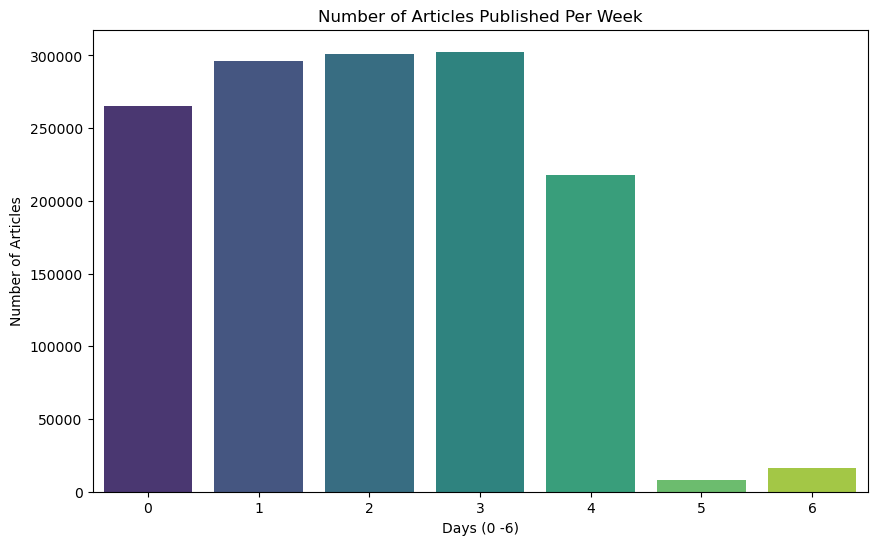

c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.df, x='hour', palette='viridis')


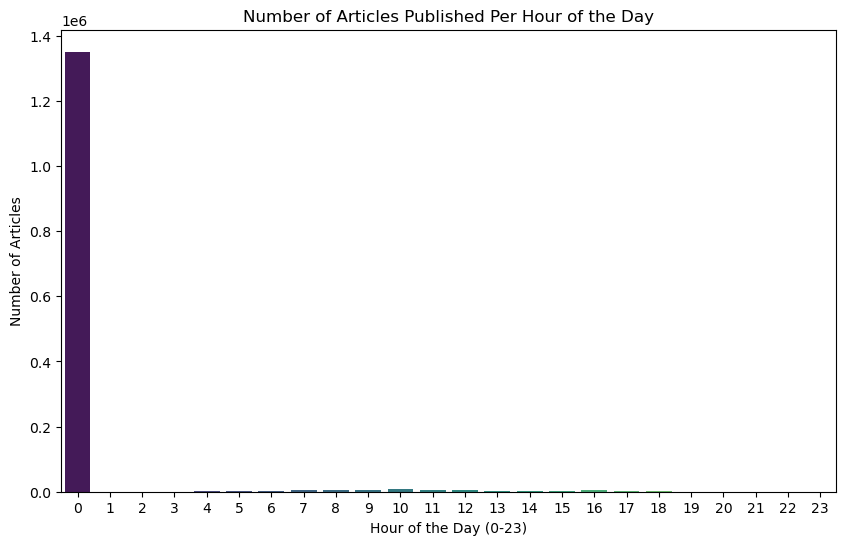

In [16]:
analyzer.articles_published()

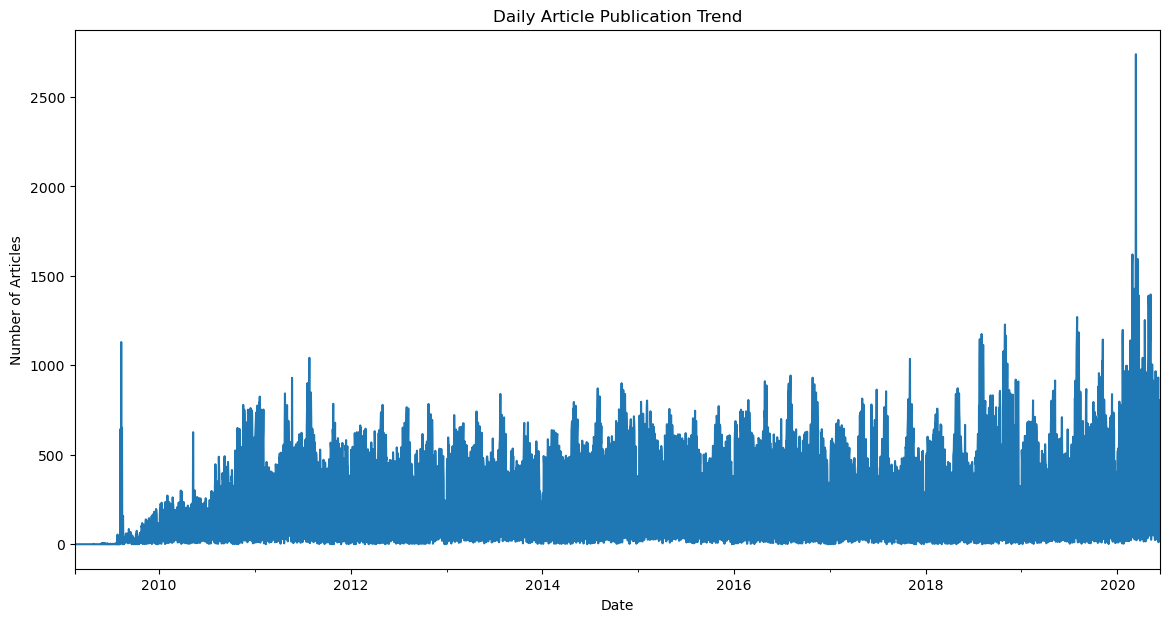

In [17]:
analyzer.daily_article_trend()

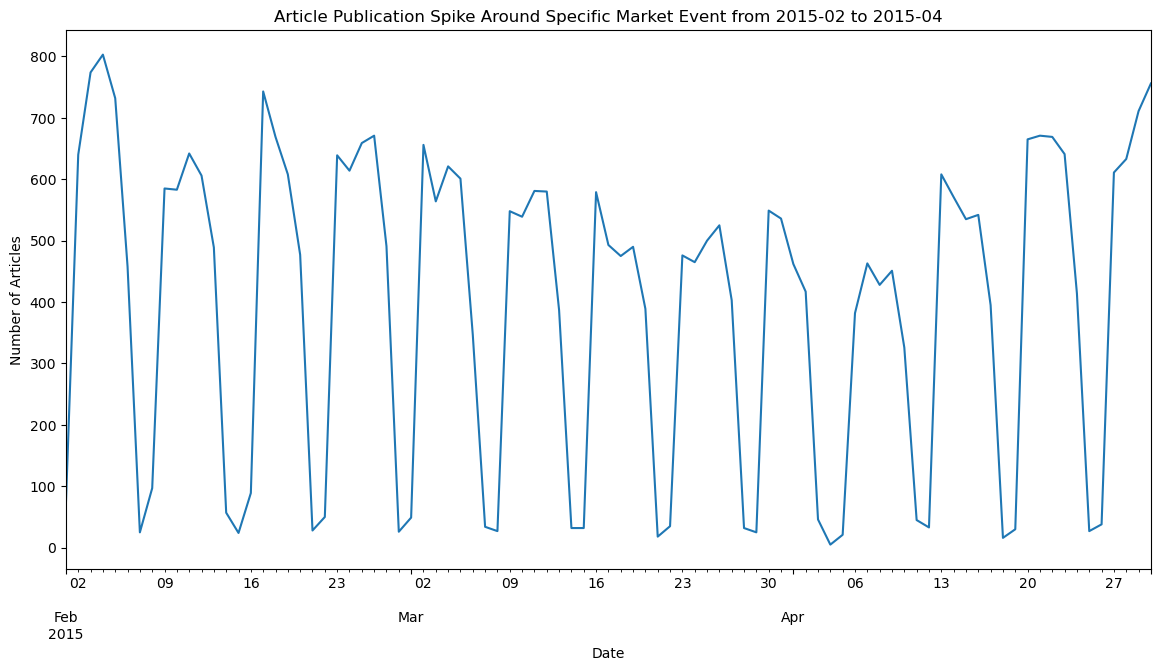

In [18]:
analyzer.specific_market_event('2015-02', '2015-04')

domain
Other                     1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64


c:\Users\Ashis\Desktop\KAIM Program 2\week_1project\scripts\sentiment_analysis.py:222: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_counts.index, y=domain_counts.values, palette='magma')


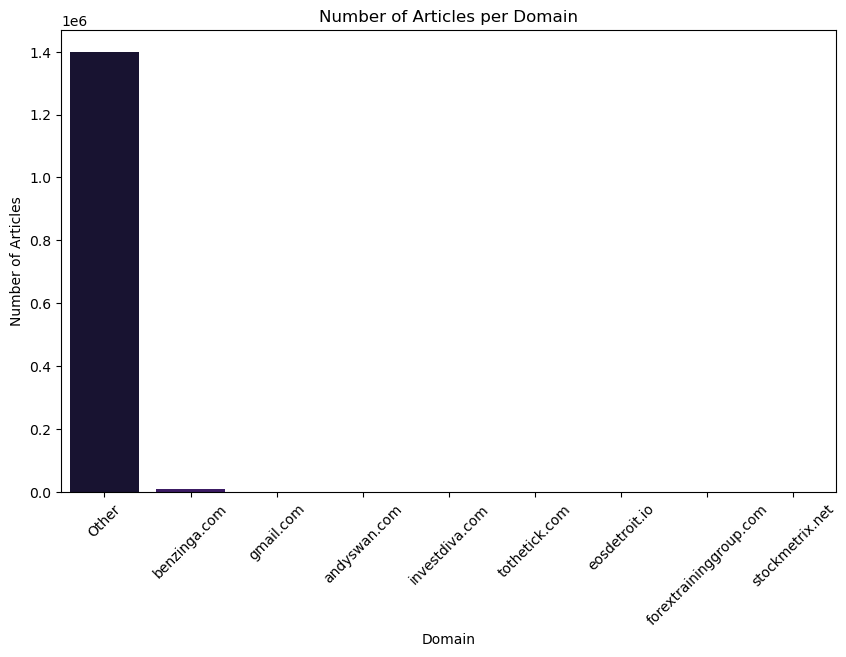

In [19]:
analyzer.extract_domain()

In [20]:
raw_analyst['processed_headline'] = raw_analyst['headline'].apply(analyzer.preprocess_text)

In [21]:
lda_model, vectorizer = analyzer.topic_modeling(num_topics = 5, num_words = 10, sample_size = 1000)

Topic 0:
est eps report sale revenue share estimate fy adj earnings
Topic 1:
benzinga earnings say upgrade scheduled downgrade etf february china update
Topic 2:
market share stock mid update day higher session trading biggest
Topic 3:
stock benzinga option alert dividend august oi biotech etf fda
Topic 4:
stock pt week buy maintains target announces neutral lower price


In [22]:
analyzer.visualize_topics(lda_model, vectorizer)

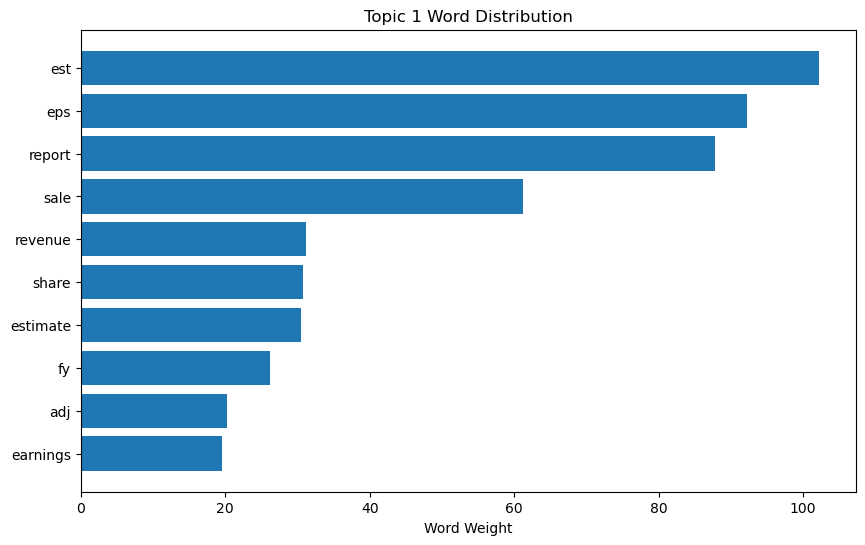

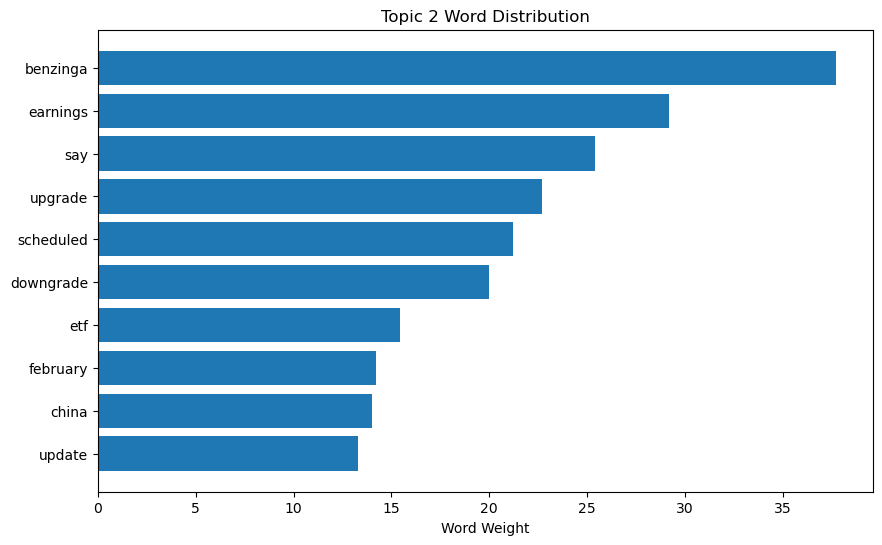

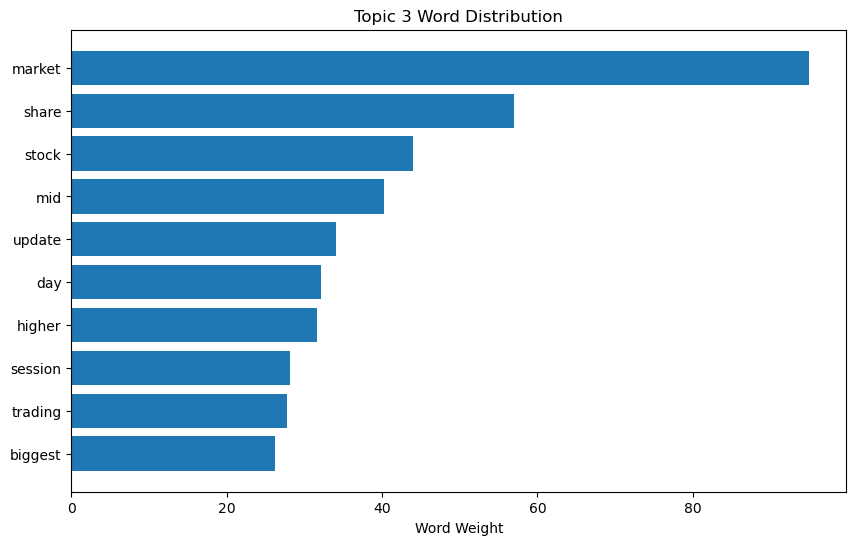

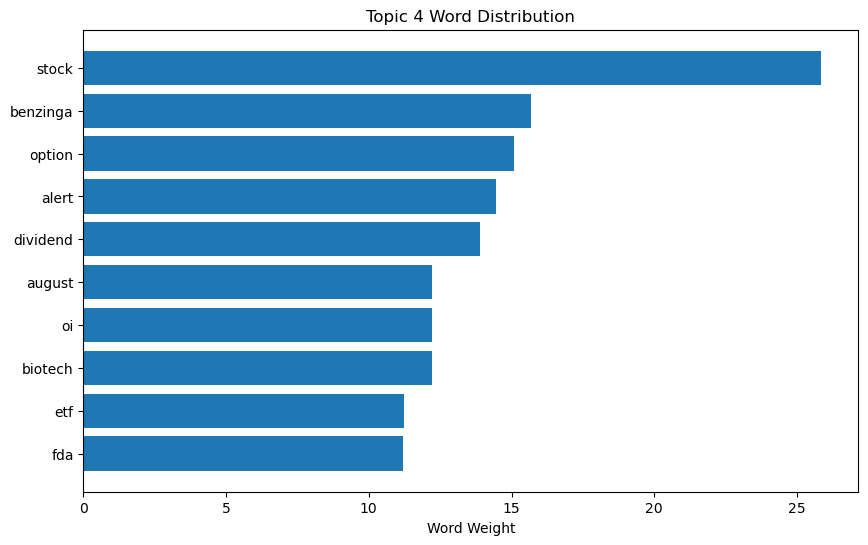

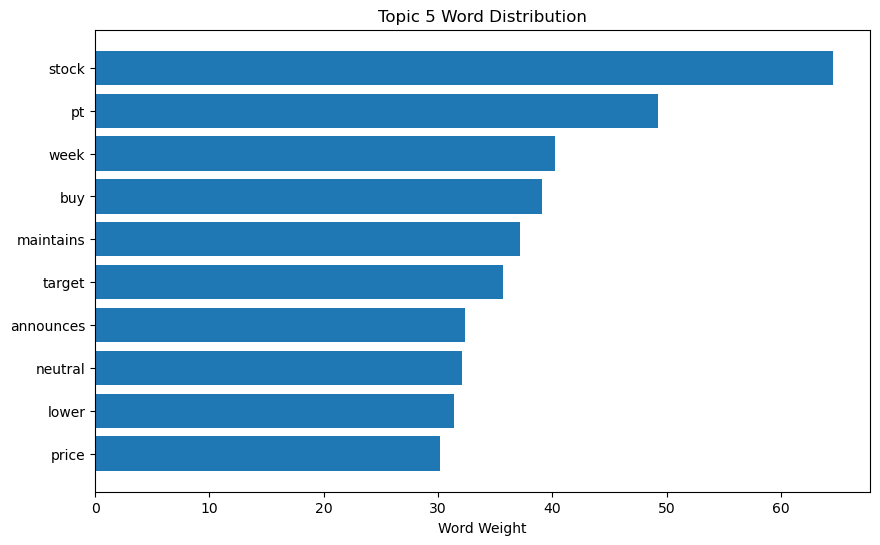

In [23]:
analyzer.plot_topic_word_distribution(lda_model, vectorizer)